In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')
import math

In [2]:
with open("data.txt") as f:
    lines = f.readlines()

In [3]:
lines = [l.rstrip().split(',') for l in lines]

In [4]:
data = np.array(np.intc(lines))

In [5]:
size_in_feet = data[:, 0]

In [6]:
size_in_feet

array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
       2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
       1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
       3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
        852, 1852, 1203], dtype=int32)

In [7]:
price_in_1000 = np.array([round(arr[2]/1000, 2) for arr in data])

In [8]:
price_in_1000

array([399.9, 329.9, 369. , 232. , 539.9, 299.9, 314.9, 199. , 212. ,
       242.5, 240. , 347. , 330. , 699.9, 259.9, 449.9, 299.9, 199.9,
       500. , 599. , 252.9, 255. , 242.9, 259.9, 573.9, 249.9, 464.5,
       469. , 475. , 299.9, 349.9, 169.9, 314.9, 579.9, 285.9, 249.9,
       229.9, 345. , 549. , 287. , 368.5, 329.9, 314. , 299. , 179.9,
       299.9, 239.5])

In [9]:
house_sizes_and_prices = np.array([size_in_feet, price_in_1000]).T

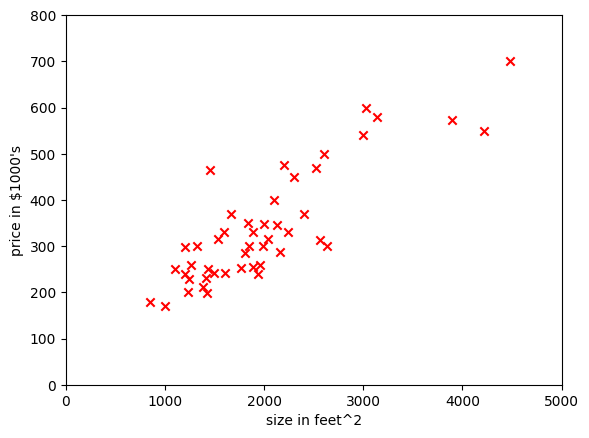

In [10]:
plt.scatter(house_sizes_and_prices[:, 0], house_sizes_and_prices[:, 1], c='#ff0000', marker='x')
plt.ylabel("price in $1000's")
plt.xlabel("size in feet^2")
plt.axis([0, 5000, 0, 800])
plt.show()

### Number of training examples

In [11]:
data_array = np.array((size_in_feet, price_in_1000)).T

In [28]:
split = math.floor(data_array.shape[0] * 0.75)
print(f"Number of training examples is: {split}")

Number of training examples is: 35


In [13]:
data_array[:, 0]

array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380.,
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

In [14]:
data_array[:, 1]

array([399.9, 329.9, 369. , 232. , 539.9, 299.9, 314.9, 199. , 212. ,
       242.5, 240. , 347. , 330. , 699.9, 259.9, 449.9, 299.9, 199.9,
       500. , 599. , 252.9, 255. , 242.9, 259.9, 573.9, 249.9, 464.5,
       469. , 475. , 299.9, 349.9, 169.9, 314.9, 579.9, 285.9, 249.9,
       229.9, 345. , 549. , 287. , 368.5, 329.9, 314. , 299. , 179.9,
       299.9, 239.5])

In [15]:
np.random.shuffle(data_array)
x_train, x_test = data_array[:, 0][:split], data_array[:, 0][split:]
y_train, y_test = data_array[:, 1][:split], data_array[:, 1][split:]

In [16]:
print(f"x_train.shape: {x_train.shape}")

x_train.shape: (35,)


### Training example `x_i, y_i`

In [17]:
i = 16

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(16), y^(16)) = (1427.0, 199.0)


### Plotting the data

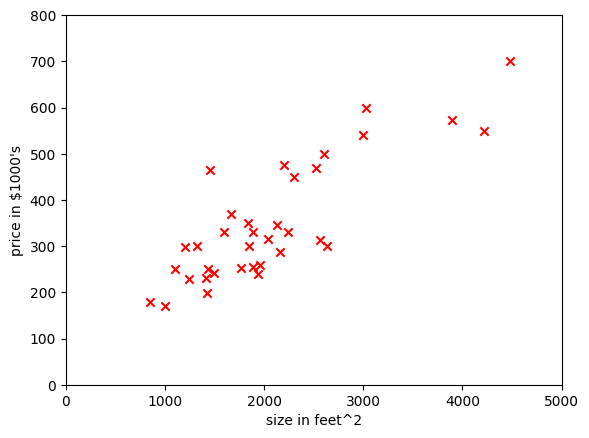

In [18]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.ylabel("price in $1000's")
plt.xlabel("size in feet^2")
plt.axis([0, 5000, 0, 800])
plt.show()

### Model function

In [19]:
w = 0.06
b = 50
print(f"w: {w}")
print(f"b: {b}")

w: 0.06
b: 50


In [20]:
def compute_model_output(x, w, b):
    """
    Computer the prediction of a linear model
    Args:
        x (ndarray (m,)): Data, m examples
        w,b (scalar)    : model parameters
    Returns
        y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb

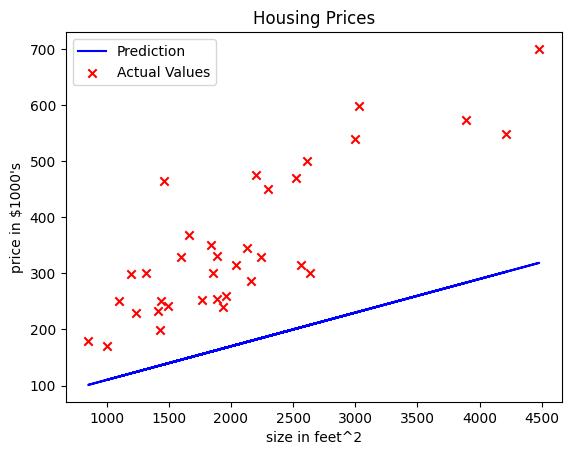

In [21]:
tmp_f_wb = compute_model_output(x_train, w, b)

plt.plot(x_train, tmp_f_wb, c='b', label='Prediction')
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')
plt.title("Housing Prices")
plt.ylabel("price in $1000's")
plt.xlabel("size in feet^2")
plt.legend()
plt.show()

### Computing cost

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m}\sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

In [25]:
 def compute_cost(x, y, w, b):
    """
    Computer the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values)
      w, b (scalar)   : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
                to fit the data points in x and y
    """
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

### Gradient descent


Repeat until convergence:
$$ w_{new} = w - \alpha\frac{d}{dw}J(w, b) $$
$$ b_{new} = b - \alpha\frac{d}{db}J(w, b) $$
, where
$$ \frac{dJ(w,b)}{dw} = \frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})x^{(i)} $$
$$ \frac{dJ(w,b)}{db} = \frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)}) $$
and $\alpha$ is the learning rate.

In [29]:
x_train, y_train

(array([1664., 1239., 1320., 2200., 4215., 2040., 1416., 2300., 2567.,
        1839., 2637., 1437., 3000., 1200., 1100., 1962., 1427., 1888.,
        2238., 1458., 1494., 1940., 2526., 1767., 3890.,  852., 2609.,
        1000., 4478., 2132., 2162., 1852., 3031., 1600., 1890.]),
 array([368.5, 229.9, 299.9, 475. , 549. , 314.9, 232. , 449.9, 314. ,
        349.9, 299.9, 249.9, 539.9, 299. , 249.9, 259.9, 199. , 255. ,
        329.9, 464.5, 242.5, 240. , 469. , 252.9, 573.9, 179.9, 500. ,
        169.9, 699.9, 345. , 287. , 299.9, 599. , 329.9, 330. ]))